# Blog post
Code presented below is a part of the blog post describing of how to run TensorFlow Lite model on mobile device. [Link to the blog post](https://medium.com/@froger_mcs/mobile-intelligence-tensorflow-lite-classification-on-android-c081278d9961).

# MNIST for mobile devs

This notebook is just the longer, more detailed version of [Get Started with TensorFlow](https://www.tensorflow.org/tutorials/) ([Colab notebook](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb#scrollTo=T4JfEh7kvx6m)). The intention here is to show the way of thinking that can be useful for you, as a consumer of TensorFlow model. It shows where some numbers come from, so you know how to plug in your first model to Android or any other platform supporting TensorFlow lite.

**Hey, mobile engineer**, look for -> (⚠️📲👀). It can be useful information for you while implementing MNIST model in mobile app.

## TensorFlow 2.0 alpha and Colaboratory
Examples presented in this notebook are built on top of TensorFlow 2.0 alpha version. As long as it's not a stable version yet, there is no guarantee that anything here will work as it should. 

This notebook was created only for the Colaboratory environment. It requires some changes to make it working on Docker environment described in linked blog post.

### GPU support
The good thing about Colab is that it supports GPU envinronment without additional work. Just open **Runtime -> Change runtime type** and make sure that GPU is selected. The training process of this notebook should be about 3 times faster than on CPU env.

In [0]:
# Install TensorFlow 2.0 alpha
!pip install tensorflow-gpu==2.0.0-alpha0

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# Get some knowledge about current environment 
print("TensorFlow version {}".format(tf.__version__))
print("Eager mode: ", tf.executing_eagerly())
print("Is GPU available: ", tf.test.is_gpu_available())

TensorFlow version 2.0.0-alpha0
Eager mode:  True
Is GPU available:  True


Load MNIST dataset:

In [0]:
mnist = tf.keras.datasets.mnist
(images_train, labels_train),(images_test, labels_test) = mnist.load_data()
class_names = ["zero","one","two","three","four","five","six","seven","eight","nine"]

## What is our training data?

### Training images

In [0]:
print("Data type:", type(images_train))
print("Dataset shape:", (images_train.shape))

Data type: <class 'numpy.ndarray'>
Dataset shape: (60000, 28, 28)


It means that we get array of 60000 images for training, 28x28 pixels each.

### Labels

In [0]:
print("Labels:", len(labels_train))
print("Possible values:", np.unique(labels_train))

Labels: 60000
Possible values: [0 1 2 3 4 5 6 7 8 9]


### Example image

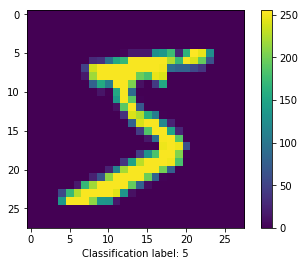

In [0]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel("Classification label: {}".format(labels_train[0]))
plt.show()

Each cell (pixel) can have value from 0 to 255 like it's presented above. 

Let's scale it to float value between 0 and 1:

In [0]:
images_train = images_train / 255.0
images_test = images_test / 255.0

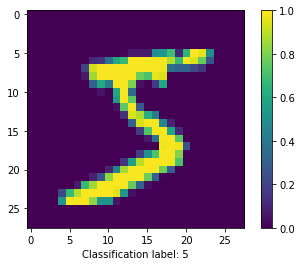

In [0]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()
plt.grid(False)
plt.xlabel("Classification label: {}".format(labels_train[0]))
plt.show()

---
(⚠️📲👀)

It is worth mentioning that input images are inverted (white number on black background). MNIST data is prepared in a way where the smaller pixel's value is, the whiter it is (0 means 100% white, 255 means 100% black). 

It's important because when you plug in model to an Android app, you will need to prepare input image in the same way (scale down and inverse colors).

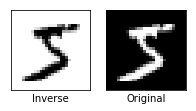

In [0]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 6, 1)
plt.xticks([])
plt.yticks([])
plt.xlabel("Inverse")
plt.imshow(images_train[0], cmap=plt.cm.binary)

plt.subplot(3, 6, 2)
plt.xticks([])
plt.yticks([])
plt.xlabel("Original")
plt.imshow(images_train[0], cmap=plt.cm.gray)

## Model training

In [0]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(512, activation=tf.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(512, activation=tf.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(images_train, labels_train, epochs=16)

Epoch 1/16
60000/60000 [==============================] - 7s 110us/sample - loss: 0.2109 - accuracy: 0.9363
Epoch 2/16
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1040 - accuracy: 0.9681
Epoch 3/16
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0784 - accuracy: 0.9754
Epoch 4/16
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0673 - accuracy: 0.9790
Epoch 5/16
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0565 - accuracy: 0.9822
Epoch 6/16
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0517 - accuracy: 0.9834
Epoch 7/16
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0475 - accuracy: 0.9859
Epoch 8/16
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0396 - accuracy: 0.9876
Epoch 9/16
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0380 - accuracy: 0.9880
Epoch 10/16
60000/60000 [===

In [0]:
test_loss, test_acc = model.evaluate(images_test, labels_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.0963 - accuracy: 0.9834
Test accuracy: 0.9834


## Model evaluation 

Let's take one image from the test set:

In [0]:
example_img = images_test[0]

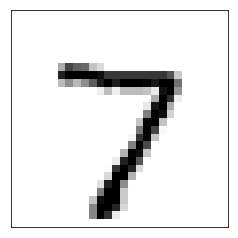

In [0]:
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(example_img, cmap=plt.cm.binary)

What does our prediction say?

In [0]:
example_img_as_input = (np.expand_dims(example_img,0))
print("Image data shape:", example_img_as_input.shape)

img_prediction = model.predict(example_img_as_input)
print("Prediction results:", img_prediction)
print("Predicted value:", np.argmax(img_prediction))

Image data shape: (1, 28, 28)
Prediction results: [[1.0788933e-14 1.4650940e-12 6.0920223e-15 1.3272965e-11 7.1915976e-12
  2.5384107e-14 1.5353486e-21 1.0000000e+00 8.4366954e-16 4.2043040e-09]]
Predicted value: 7


Visualise more predictions. Plot the first X test images, their predicted label, and the true label. Color correct predictions in blue, incorrect predictions in red.

In [0]:
# Helper functions

import matplotlib.pyplot as plt
import numpy as np


def plot_image(i, predictions_array, true_label, img, class_names):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100 * np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


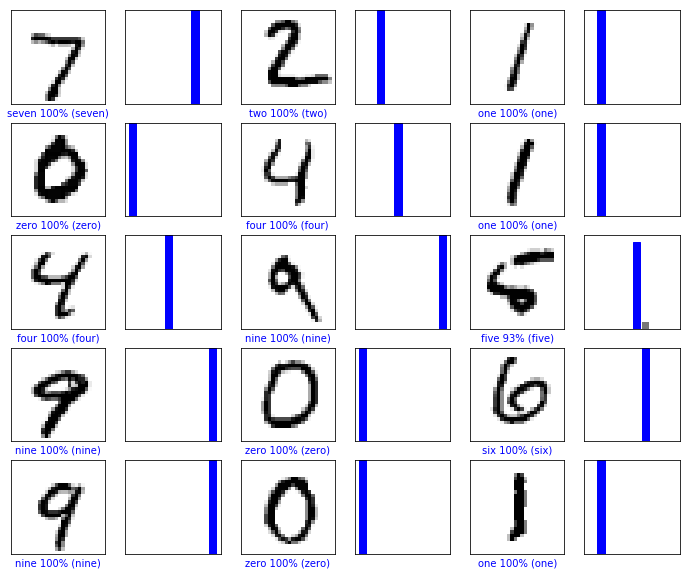

In [0]:
predictions = model.predict(images_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2  *2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, labels_test, images_test, class_names)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, labels_test)

## Save and export model

In [0]:
model.summary()
loss, acc = model.evaluate(images_test, labels_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
print("Restored model, loss: {}".format(loss))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

In [0]:
keras_mnist_model = 'mnist_model.h5'

In [0]:
keras.experimental.export_saved_model(model, keras_mnist_model)

W0423 21:27:17.186232 140304039348096 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:253: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.
W0423 21:27:17.188185 140304039348096 tf_logging.py:161] Export includes no default signature!
W0423 21:27:17.698384 140304039348096 tf_logging.py:161] Export includes no default signature!


### Load saved model
Just to make sure that it looks the same as the one that we created.

In [0]:
new_model = keras.experimental.load_from_saved_model(keras_mnist_model)
print(new_model.get_config())

#Get input shape from model.get_config()
new_model.build((None, 28, 28, 1))
new_model.summary()

{'name': 'sequential', 'layers': [{'class_name': 'Flatten', 'config': {'name': 'flatten', 'trainable': True, 'batch_input_shape': (None, 28, 28), 'dtype': 'float32', 'data_format': 'channels_last'}}, {'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dropout', 'config': {'name': 'dropout', 'trainable': True, 'dtype': 'float32', 'rate': 0.2, 'noise_shape': None, 'seed': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bia

In [0]:
# The model has to be compiled before the evaluation
new_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
loss, acc = new_model.evaluate(images_test, labels_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
print("Restored model, loss: {}".format(loss))

10000/10000 [==============================] - 1s 65us/sample - loss: 0.0963 - accuracy: 0.9834
Restored model, accuracy: 98.34%
Restored model, loss: 0.09630093355918413


## Convert model to TensorFlow Lite

### Concrete function 

Because TensorFlow 2.0 has eager execution enabled by default (as the opposition to TensorFlow 1.x), we need to create concrete function from our model. More about why it has to be done this way can be found on the official documentation website: https://www.tensorflow.org/lite/r2/convert/concrete_function

In [0]:
tflite_mnist_model = "mnist_model.tflite"

# Get the concrete function from the Keras model.
run_model = tf.function(lambda x : model(x))

# Save the concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

# Convert the model.
converter = tf.lite.TFLiteConverter.from_concrete_function(concrete_func)
tflite_model = converter.convert()
open(tflite_mnist_model, "wb").write(tflite_model)

5359976

(⚠️📲👀)

Now learn more about out TensorFlow Lite model. You need to know those information when you will implement model in client app (Android, iOS, anything else using TensorFlow Lite).

In [0]:
interpreter = tf.lite.Interpreter(model_path=tflite_mnist_model)
interpreter.allocate_tensors()

print("== Input details ==")
print("name:", interpreter.get_input_details()[0]['name'])
print("shape:", interpreter.get_input_details()[0]['shape'])
print("type:", interpreter.get_input_details()[0]['dtype'])

print("\n== Output details ==")
print("name:", interpreter.get_output_details()[0]['name'])
print("shape:", interpreter.get_output_details()[0]['shape'])
print("type:", interpreter.get_output_details()[0]['dtype'])

print("\nDUMP INPUT")
print(interpreter.get_input_details()[0])
print("\nDUMP OUTPUT")
print(interpreter.get_output_details()[0])

== Input details ==
name: x
shape: [ 1 28 28]
type: <class 'numpy.float32'>

== Output details ==
name: Identity
shape: [ 1 10]
type: <class 'numpy.float32'>

DUMP INPUT
{'name': 'x', 'index': 16, 'shape': array([ 1, 28, 28], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}

DUMP OUTPUT
{'name': 'Identity', 'index': 0, 'shape': array([ 1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}


From input details we learn that input shape is [1 28 28] and its type - Float32. On mobile app we'll need to create byte array of size: 3136 bytes (28 x 28 x 4). 4 is size of Float32 value.

## TensorFlow Lite model evaluation
Let's make sure our TF Lite model is still working after the conversion. 

Pick random image:

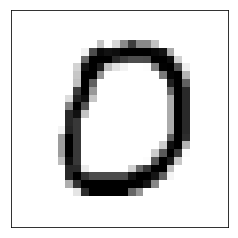

In [0]:
example_img_for_tflite = images_test[10]

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(example_img_for_tflite, cmap=plt.cm.binary)

Make sure that input data is matching to model's input and make a prediction! 🙂

In [0]:
example_img_for_tflite = np.expand_dims(example_img_for_tflite,0).astype(np.float32)
print("Input data shape:", example_img_for_tflite.shape)
print("Input data type:", example_img_for_tflite.dtype)

input_details = interpreter.get_input_details()
interpreter.set_tensor(input_details[0]['index'], example_img_for_tflite)

interpreter.invoke()

output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("\n\nPrediction results:", output_data)
print("Predicted value:", np.argmax(output_data))

Input data shape: (1, 28, 28)
Input data type: float32


Prediction results: [[1.0000000e+00 1.0147444e-38 2.8911111e-24 5.7113098e-27 6.0094436e-28
  2.0547044e-28 4.4531010e-19 2.9089317e-25 7.8072333e-36 8.1194458e-21]]
Predicted value: 0


Classify image from the outside. Something similar what app will do.

Prediction results: [[1.0000000e+00 0.0000000e+00 5.1312644e-32 1.6449590e-29 3.9925796e-41
  5.1516724e-28 1.5349223e-27 5.5479912e-23 6.8388410e-40 6.2732055e-32]]
Predicted value: 0


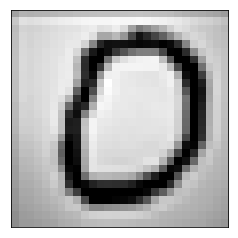

In [0]:
from PIL import Image
import PIL.ImageOps  
import requests

imgUrl = "https://raw.githubusercontent.com/frogermcs/MNIST-TFLite/master/notebooks/test.png"
img = Image.open(requests.get(imgUrl, stream=True).raw).convert('L')
img.load()
img = PIL.ImageOps.invert(img)
data = np.asarray( img, dtype="int32" )

plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(data, cmap=plt.cm.binary)

data = data / 255.0
inputImg = np.expand_dims(data,0).astype(np.float32)
inputImg.shape

input_details = interpreter.get_input_details()
interpreter.set_tensor(input_details[0]['index'], inputImg)

interpreter.invoke()

output_details = interpreter.get_output_details()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results:", output_data)
print("Predicted value:", np.argmax(output_data))